In [1]:
import Bio
import numpy
import matplotlib.pyplot as plt
from Bio import SeqIO

In [4]:
seqX = SeqIO.read('x.fasta','fasta').seq

print(len(seqX))

seqY = SeqIO.read("y.fasta","fasta").seq

print(len(seqY))

1883
1050


In [5]:
print(seqX.find("CGC"))
print(seqY.find("CGC"))

51
39


In [6]:
seqZ = seqX[:10] + seqX[-5:] + seqY[:20] + seqY[-3:]

seqZ = seqZ[::-1]

print(seqZ)

CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA


In [7]:
ac_content = [x for x in seqZ if x in 'AC']

print(ac_content)

['C', 'A', 'A', 'C', 'C', 'A', 'A', 'A', 'C', 'A', 'C', 'A', 'A']


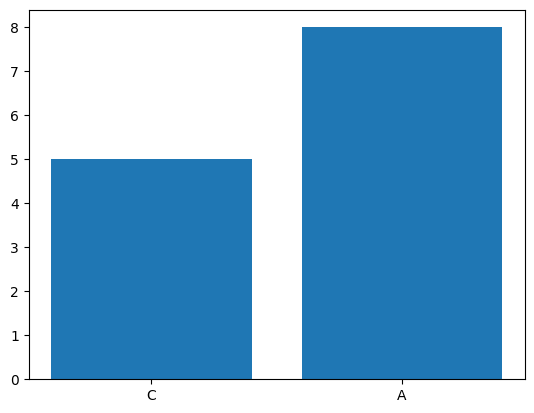

In [8]:
from collections import Counter

ac_count = Counter(ac_content)

plt.bar(ac_count.keys(),ac_count.values())

plt.show()

In [9]:
from Bio.SeqUtils import gc_fraction

GC = gc_fraction(seqZ)
AT = 1 - GC

print(GC)
print(AT)

0.5
0.5


In [10]:
from Bio.SeqUtils import MeltingTemp as mt

print(mt.Tm_Wallace(seqZ))

from Bio.SeqUtils import molecular_weight as mw 

print(mw(seqZ))

114.0
11924.584100000002


In [13]:
rnaZ = seqZ.transcribe()

print(rnaZ)

acidZ = seqZ.translate()

print(acidZ)

CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA
QTVSR*L*LRLW


C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [14]:
from Bio import pairwise2

local_alignments = pairwise2.align.localxx(seqX,seqY)

for alignment in local_alignments:
    print(alignment)

C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Alignment(seqA='ATGGTGTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--GNNNNNNNNNNNNNNNNNN-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCT

In [15]:
global_alignments = pairwise2.align.globalxx(seqY,seqZ)

for alignment in global_alignments:
    print(alignment)

Alignment(seqA='GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCCGAAAGAGATCGAAGGTCTGGAAGAACGCCTGAAATCGCGTTTCGGCTGGGGCCTGACTGTTGCAGTA

In [16]:
def hamming(s1,s2):
    return sum(ch1 != ch2 for ch1,ch2 in zip(s1,s2))

from Levenshtein import distance

print(hamming(seqX,seqY))

print(distance(seqX,seqY))

758
1045


In [20]:
def delta(x,y):
    return 0 if x == y else 1

def M(s1,s2,i,j,k):
    return sum(delta(x,y) for x,y in zip(s1[i:i+k],s2[j:j+k]))

def makeMatrix(s1,s2,k):
    n = len(s1)
    m = len(s2)
    return [[M(s1,s2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,s1,s2,nonblank = chr(0x25A0), blank = ' '):
    print(" |" + s2)
    print('-'*(4+len(s2)))
    for nucleotide, row in zip(s1,M):
        line = ''.join(nonblank if s < 1 else blank for s in row)
        print(nucleotide + '|' + line)

def dotPlot(s1,s2,k):
    M = makeMatrix(s1,s2,k)
    plotMatrix(M,s1,s2)

dotPlot(seqX,seqZ,2)


 |CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA
------------------------------------------
A|                                     
T|               ■   ■ ■   ■     ■ ■   
G|     ■       ■              ■     ■  
G|      ■       ■     ■        ■  ■  ■ 
T|               ■   ■ ■   ■     ■ ■   
G|      ■       ■     ■        ■  ■  ■ 
T|       ■■                     ■      
T|               ■   ■ ■   ■     ■ ■   
G|     ■       ■              ■     ■  
G|  ■             ■     ■   ■          
A|                                     
T|         ■                           
C|                  ■     ■            
T|               ■   ■ ■   ■     ■ ■   
G|     ■       ■              ■     ■  
G|  ■             ■     ■   ■          
A|   ■             ■     ■             
C|                  ■     ■            
T|       ■■                     ■      
T|               ■   ■ ■   ■     ■ ■   
G|      ■       ■     ■        ■  ■  ■ 
T|       ■■                     ■      
T|       ■■                     ■   